# Introduction to Artificial Neural Networks

## 神经网络(ANN)的开山论文
> ### 1943 A Logical Calculus of Ideas Immanent in Nervous Activity  
>### 神经活动内在性的逻辑计算(神经元M-P模型)   

![](https://s1.ax1x.com/2018/06/09/Cq9r79.png)
![](https://s1.ax1x.com/2018/06/10/CqkWeU.png)

>#### 细胞体(soma)   神经元控制中心，产生膜电位   
>#### 树突(dendron/dendrites)  神经元输入端
>#### 轴突(axon)     末端有大量神经末梢，细胞体输出端
>#### 突触(synapse)  神经元之间的I/O口

# Logical Computations with Neurons
神经元的逻辑运算   
神经元接受二进制输入，当达到阈值时激活输出，通过简单组合可以模拟出大部分运算   
例如：假设神经元接受超过两个刺激则激活输出    


人造神经元只能接受刺激，1957年提出的$linear\ threshold\ unit(LTU)$则可以接受数值输入,    
其汇总所有的输入$\mathbf{z}=\mathbf{w}^T\cdot \mathbf{x}$，经过step function(阶跃函数)输出数值$step(\mathbf{z})$    
常见的两种阶跃函数：   
单位阶跃函数$heaviside(z)=\begin{cases}
 0 & \text{ if } z<0 \\ 
 1 & \text{ if } z\geq 0
\end{cases}$, 符号函数$sgn(z)=\begin{cases}
 -1 & \text{ if } z<0 \\ 
 0 & \text{ if } z= 0 \\
 1 & \text{ if } z > 0
\end{cases}$

# The Perceptron 
我们一般称感知机即单层$LTUs$，只有输入层和输出层构成，其中输入层中含有$bias\ neuron$偏置神经元($x_0=1$)   
**如何训练感知机（神经元）**   
根据*Hebb's rule* ——“$\mathrm{Cells\ that\ fire\ together,\ wire\ together}$” 一起激发的神经元连接在一起   
基于Hebb定理的学习称为Hebb Learning   
感知机训练使用Hebb定理的变体，其着重考虑错网络误输出，更新连接上权重


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.97      0.97      0.97        38



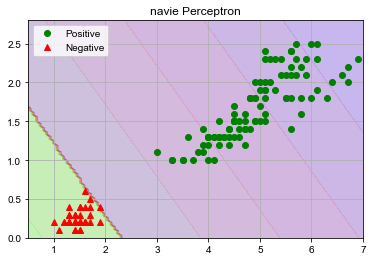

In [10]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow_graph_in_jupyter import show_graph
import matplotlib.pylab as plt

data = load_iris()
X = data['data'][:, (2, 3)]
y = (data['target'] == 0).astype(np.int)

def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'go', label='Positive')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^', label='Negative')
    plt.grid(True, which='both')
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.legend()
    # x,y,z z为(x,y)点值

plot_dataset(X, y)
X_train, X_test, y_trian ,y_test = train_test_split(X, y, random_state=0)

per_clf = Perceptron(max_iter=1000) # 仅支持二分类的感知机，训练的是输入层上的权重，类似GD
per_clf.fit(X_train, y_trian)
y_pred = per_clf.predict(X_test)

print(classification_report(y_test, y_pred))
plt.title(r'navie Perceptron')
plot_predictions(per_clf, axes=[0.5,7, 0, 2.8])
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.97      0.97      0.97        38



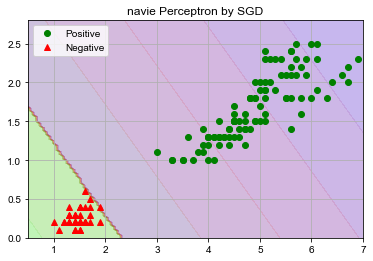

In [11]:
from sklearn.linear_model import SGDClassifier

plot_dataset(X, y)
X_train, X_test, y_trian ,y_test = train_test_split(X, y, random_state=0)

per_gd_clf = SGDClassifier(max_iter=1000, loss='perceptron', learning_rate='constant', 
                           eta0=1, penalty=None, random_state=0)
per_gd_clf.fit(X_train, y_trian)
y_gd_pred = per_gd_clf.predict(X_test)

print(classification_report(y_test, y_gd_pred))
plt.title(r'navie Perceptron by SGD')
plot_predictions(per_gd_clf, axes=[0.5,7, 0, 2.8])
plt.show()

感知机收敛理论：解不唯一

单层感知机无法解决非线性问题例如异或划分

### Mutil-Layer Perceptron($MLP$) and Backpropagation

$\mathrm{MLP}$由多个$Hidden$层构成，故也称之为$deep\ neural\ network(DNN)$

反向传播算法利用梯度更新连接权重下降，所以我们用逻辑斯蒂方程代替阶跃函数，   
此外我们引入激活函数调整逻辑斯蒂函数的输出在$[-1,1]$上    
以使得每层的输出在开始训练的时候或多或少标准化(more or less normalized)    
使输出在0附近和加快收敛

常用的激活函数($\mathrm{activation\ function}$)：

$1.\ \ hyperbolic\ tangent\ function\ \  tanh(z)=2\sigma (2z)-1$

$2.\ \ \mathrm{The\ ReLU\ function}\ \ $    $ReLU(z)=max(z, 0)$   
[tanh is a rescaled logistic sigmoid function](https://brenocon.com/blog/2013/10/tanh-is-a-rescaled-logistic-sigmoid-function/)

CPU times: user 1.78 s, sys: 19.4 ms, total: 1.8 s
Wall time: 1.81 s


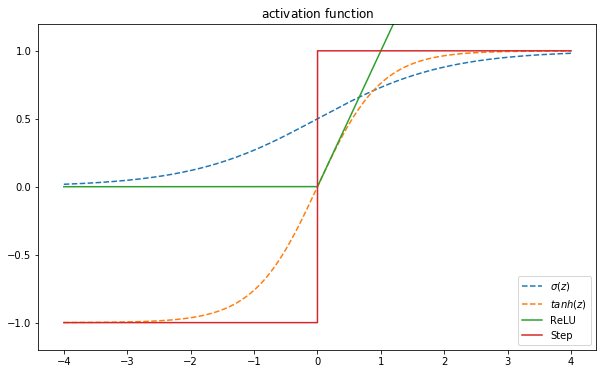

In [47]:
%%time
import matplotlib.pylab as plt
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 100000)
y1 = 1.0 / (1 + np.exp(-x))
y2 = 2.0 / (1 + np.exp(-2*x)) - 1
y3 = []
y4 = []
for i in x:
    y3.append(max(0, i))
    if(i < 0):
        y4.append(-1.0)
    elif np.allclose(i, 0):
        y4.append(0)
    else :
        y4.append(1)
plt.title(r'$\mathrm{activation\ function}$')
plt.plot(x, y1, '--', label=r'$\sigma(z)$');
plt.plot(x, y2, '--', label=r'$tanh(z)$');
plt.plot(x, y3, label=r'ReLU');
plt.plot(x, y4, label=r'Step')
plt.ylim(-1.2, 1.2)
plt.legend(loc="lower right")

当class互斥时，使用Softmax代替个体激活函数

### FNN($feedforward\ neural\ network$)  
前馈神经网络

#### MLP apply in MNIST classification base on TensorFlow High-Level API

In [12]:
%%time
# ================================================================================================
# MLP apply in MNIST classification base on TensorFlow High-Level API
# two hidden layers; 1st: 300 neurons; 2ed: 100 neurons
# Softmax output alyer with 10 neurous

import tensorflow as tf
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # 使用keras后端调取数据
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/6)

CPU times: user 743 ms, sys: 395 ms, total: 1.14 s
Wall time: 1.33 s


In [13]:
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28*28])] # 数值特征列
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(x={'X':X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/v2/tbmrn60d2910x3w23ys5fgs00000gn/T/tmpj44_uomc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13dedd2e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
CPU times: user 12.9 ms, sys: 18.6 ms, total: 31.6 ms
Wall time: 39.5 ms


In [14]:
dnn_clf.train(input_fn=input_fn)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/v2/tbmrn60d2910x3w23ys5fgs00000gn/T/tmpj44_uomc/model.ckpt.
INFO:tensorflow:loss = 122.77714, step = 1
INFO:tensorflow:global_step/sec: 84.9105
INFO:tensorflow:loss = 15.66149, step = 101 (1.179 sec)
INFO:tensorflow:global_step/sec: 117.947
INFO:tensorflow:loss = 10.558824, step = 201 (0.848 sec)
INFO:tensorflow:global_step/sec: 110.348
INFO:tensorflow:loss = 7.6612525, step = 301 (0.906 sec)
INFO:tensorflow:global_step/sec: 100.442
INFO:tensorflow:lo

In [15]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'X': X_test}, y = y_test, shuffle=False # 打乱标记
)
eval_result = dnn_clf.evaluate(input_fn=test_input_fn)
print('DNNC in Test Set', eval_result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-23-01:18:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/v2/tbmrn60d2910x3w23ys5fgs00000gn/T/tmpj44_uomc/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-23-01:18:33
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.9805, average_loss = 0.10567828, global_step = 40000, loss = 13.376998
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 40000: /var/folders/v2/tbmrn60d2910x3w23ys5fgs00000gn/T/tmpj44_uomc/model.ckpt-40000
DNNC in Test Set {'accuracy': 0.9805, 'average_loss': 0.10567828, 'loss': 13.376998, 'global_step': 40000}


In [16]:
# 查看每个class预测概率决策
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn) # prediction生成器
error_cnt = 0
f = 0
for i in range(len(X_test)):
    a = next(y_pred_iter)
    b = [y_test[i]][0]
    if not f:
        print(a)
        f = 1
    a = a['class_ids'][0]   
    if a != b:
        pass
#         print(i, '预测:', a, '\t标记:', b)
        error_cnt += 1
print(1 - error_cnt / len(X_test))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/v2/tbmrn60d2910x3w23ys5fgs00000gn/T/tmpj44_uomc/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([ -1.2616713 ,   0.59543365,   3.0136466 ,   4.727726  ,
        -6.679964  ,  -8.858406  , -16.89578   ,  26.587679  ,
        -4.3041744 ,  -1.009332  ], dtype=float32), 'probabilities': array([8.0386105e-13, 5.1488653e-12, 5.7800029e-11, 3.2088032e-10,
       3.5648906e-15, 4.0360982e-16, 1.3042881e-19, 1.0000000e+00,
       3.8356464e-14, 1.0345945e-12], dtype=float32), 'class_ids': array([7]), 'classes': array([b'7'], dtype=object)}
0.9805


#### DNNClassification 创建所有的含ReLU激活函数的神经元层， 输出层采取Softmax，损失函数为交叉熵

## Training a DNN Using Plain TensorFlow

#### Construction Phasea

In [1]:
import tensorflow as tf
import numpy as np

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [2]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X') # 训练输入
y = tf.placeholder(tf.int32, shape=(None), name='y') # 标记

In [3]:
def neuron_layer(X, n_neurons, name, activation=None): # 定义神经元层
    with tf.name_scope(name=name):
        n_inputs = int(X.get_shape()[1]) # 该层神经元个数
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal(shape=(n_inputs, n_neurons), stddev=stddev) # 截断标准偏差，加速模型收敛，见Chapter 11
        W = tf.Variable(initial_value=init, name='weights') # 初始化连接层间的权重，
        b = tf.Variable(tf.zeros([n_neurons]), name='biases') # 初始化为0避免了对称性
        z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(z)
        else:
            return z

In [4]:
with tf.name_scope(name='dnn'): # 定义DNNs
    hidden1 = neuron_layer(X, n_hidden1, 'hidden1', activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, 'hidden2', activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, 'output', activation=None) # 暂不处理Softmax 输出层

In [5]:
with tf.name_scope('loss'): # 定义loss function
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

In [6]:
lr = 0.01
with tf.name_scope('train'): # 定义优化器
    optimizaer = tf.train.GradientDescentOptimizer(learning_rate=lr)
    training_op = optimizaer.minimize(loss)

In [7]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1) #  y是否是logists的第一个元素，即预测是否正确
    acc = tf.reduce_mean(tf.cast(correct, tf.float32)) # 转换成float求平均

In [8]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [9]:
n_epochs = 40
batch_size = 50

In [10]:
%%time
from sklearn.model_selection  import train_test_split
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, n_inputs) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, n_inputs) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/6)

print(X_train.shape, X_val.shape)

def shufft_batch(X, y, batch_size): # 生辰batch器
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        yield X[batch_idx], y[batch_idx]

(50000, 784) (10000, 784)
CPU times: user 1.05 s, sys: 560 ms, total: 1.61 s
Wall time: 1.8 s


In [11]:
%%time
with tf.Session() as sess:
    init.run()
    with tf.name_scope('train'):
        for epoch in range(n_epochs):
            for X_batch, y_batch in shufft_batch(X_train, y_train, batch_size):
                sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
            acc_batch = acc.eval(feed_dict={X:X_batch, y:y_batch})
            acc_val = acc.eval(feed_dict={X:X_val, y:y_val})
            print('Acc_batch: %.16f <====================> Acc_val: %.16f' % (acc_batch, acc_val))
            
        saver_path = saver.save(sess, './tmp/mnist_my_final_model.ckpt')
        acc_test = acc.eval(feed_dict={X:X_test, y:y_test})
        print('Acc_test: %.16f' % acc_test)

Acc_batch: 0.8799999952316284 <====================> Acc_val: 0.9042000174522400
Acc_batch: 0.9800000190734863 <====================> Acc_val: 0.9235000014305115
Acc_batch: 0.9399999976158142 <====================> Acc_val: 0.9326999783515930
Acc_batch: 0.9200000166893005 <====================> Acc_val: 0.9373000264167786
Acc_batch: 0.9800000190734863 <====================> Acc_val: 0.9441000223159790
Acc_batch: 1.0000000000000000 <====================> Acc_val: 0.9480000138282776
Acc_batch: 0.9599999785423279 <====================> Acc_val: 0.9520999789237976
Acc_batch: 0.9800000190734863 <====================> Acc_val: 0.9548000097274780
Acc_batch: 0.9800000190734863 <====================> Acc_val: 0.9570000171661377
Acc_batch: 0.9599999785423279 <====================> Acc_val: 0.9578999876976013
Acc_batch: 0.9800000190734863 <====================> Acc_val: 0.9603000283241272
Acc_batch: 0.9599999785423279 <====================> Acc_val: 0.9634000062942505
Acc_batch: 0.959999978542327

In [11]:
import sys
from tensorflow_graph_in_jupyter import show_graph
# sys.path.append('/Users/hu-osx/Documents/Machine-Learning/handson-ml/')
show_graph(tf.get_default_graph())

使用TensorFlow全连接层代替手工实现的

In [18]:
%%time

import tensorflow as tf
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler

tf.reset_default_graph()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X_train = X_train.astype(np.float32).reshape(-1, n_inputs) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, n_inputs) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/6)

print(X_train.shape, X_val.shape)
        
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X') # 训练输入
y = tf.placeholder(tf.int32, shape=(None), name='y') # 标记

with tf.name_scope(name='dnn'): # 定义DNNs
    he_init = tf.contrib.layers.variance_scaling_initializer()
    hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name='output')
    y_prob = tf.nn.softmax(logits)
    
with tf.name_scope('loss'): # 定义loss function
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    
lr = 0.01
with tf.name_scope('train'): # 定义优化器
    optimizaer = tf.train.GradientDescentOptimizer(learning_rate=lr)
    training_op = optimizaer.minimize(loss)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1) #  y是否是logists的第一个元素，即预测是否正确
    acc = tf.reduce_mean(tf.cast(correct, tf.float32)) # 转换成float求平均

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 20
batch_size = 50

def shufft_batch(X, y, batch_size): # 生辰batch器
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        yield X[batch_idx], y[batch_idx]

with tf.Session() as sess:
    init.run()
    with tf.name_scope('train'):
        for epoch in range(n_epochs):
            for X_batch, y_batch in shufft_batch(X_train, y_train, batch_size):
                sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
            acc_batch = acc.eval(feed_dict={X:X_batch, y:y_batch})
            acc_val = acc.eval(feed_dict={X:X_val, y:y_val})
            print(epoch, 'Batch acc: %.16f <====================> Valid acc: %.16f' % (acc_batch, acc_val))
            
        saver_path = saver.save(sess, './tmp/mnist_my_final_model.ckpt')
        acc_test = acc.eval(feed_dict={X:X_test, y:y_test})
        print('Test acc: %.16f' % acc_test)
        
# Test acc: 0.9699000120162964 ('ReLU + X-init')
# Test acc: 0.9600999951362610 ('ELU' + he_init)
# show_graph(tf.get_default_graph())

(50000, 784) (10000, 784)
0 Batch acc: 0.9200000166893005 <====================> Valid acc: 0.8956999778747559
1 Batch acc: 0.8999999761581421 <====================> Valid acc: 0.9142000079154968
2 Batch acc: 0.8600000143051147 <====================> Valid acc: 0.9243999719619751
3 Batch acc: 0.9800000190734863 <====================> Valid acc: 0.9315999746322632
4 Batch acc: 0.9599999785423279 <====================> Valid acc: 0.9372000098228455
5 Batch acc: 0.9599999785423279 <====================> Valid acc: 0.9409000277519226
6 Batch acc: 0.9800000190734863 <====================> Valid acc: 0.9448999762535095
7 Batch acc: 0.8999999761581421 <====================> Valid acc: 0.9466999769210815
8 Batch acc: 0.9800000190734863 <====================> Valid acc: 0.9481999874114990
9 Batch acc: 0.9800000190734863 <====================> Valid acc: 0.9530000090599060
10 Batch acc: 0.9399999976158142 <====================> Valid acc: 0.9530000090599060
11 Batch acc: 0.9800000190734863 <====

In [19]:
# 使用Softmax过的logits预测最大可能的手写体

with tf.Session() as sess:
    saver.restore(sess, './tmp/mnist_my_final_model.ckpt') # 还原模型
    idx = 2333
    X_new_scaled = X_test[idx].reshape(1,-1)
    print('label:', y_test[idx])
    Z = logits.eval(feed_dict={X:X_new_scaled})
    sZ = tf.nn.softmax(Z)
    y_prob = np.argmax(Z, axis=1)
    print('prediction:', y_prob, ', With probability', sZ.eval().flatten()[y_prob])

INFO:tensorflow:Restoring parameters from ./tmp/mnist_my_final_model.ckpt
label: 0
prediction: [0] , With probability [0.8435133]


### Exercises

5  
>$\mathbf{X}'s\ shape\ is\ None \times 10 $     
$\mathbf{W}_h's\ shape\ is\ 10\ \times 50$